In [4]:
import random
import torch
from matplotlib import pyplot as plt

In [3]:
def synthetic_data(w, b, num_examples):
  X = torch.normal(0, 1, (num_examples, len(w))) # 方差，均值，行，列
  y = torch.matmul(X, w) + b
  y += torch.normal(0, 0.01, y.shape)
  return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [6]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([ 1.5480, -0.3927]) 
label: tensor([8.6283])


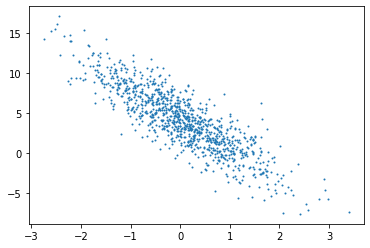

In [8]:
plt.scatter(features[:, 1].detach().numpy(),
      labels.detach().numpy(), 1);

In [11]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    batch_indices = torch.tensor(
        indices[i: min(i+batch_size, num_examples)])
    yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
  print(X, '\n', y)
  break

tensor([[-0.7690, -0.6784],
        [-0.2858, -0.1162],
        [ 1.4170,  0.4480],
        [-0.5841,  0.2860],
        [-1.3124, -1.3348],
        [ 0.3591,  0.3443],
        [-0.7120, -0.3693],
        [ 0.9432, -1.3029],
        [-0.0654,  0.7034],
        [ 0.3953,  0.3883]]) 
 tensor([[ 4.9769],
        [ 4.0082],
        [ 5.5071],
        [ 2.0607],
        [ 6.1116],
        [ 3.7568],
        [ 4.0344],
        [10.5136],
        [ 1.6820],
        [ 3.6797]])


In [14]:
w = torch.normal(0, 0.01, size = (2, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)
# w, b

In [15]:
def linreg(X, w, b):
  return torch.matmul(X, w) + b

In [16]:
def squared_loss(y_hat, y):
  return (y_hat - y.reshape(y_hat.shape))**2/2

In [17]:
def sgd(params, lr, batch_size):
  with torch.no_grad():
    for param in params:
      param -= lr*param.grad / batch_size
      param.grad.zero_()

In [24]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    l = loss(net(X, w, b), y)
    l.sum().backward()
    sgd([w, b], lr, batch_size)
  with torch.no_grad():
    train_l = loss(net(features, w, b), labels)
    print(f'epoch{epoch + 1}, loss {float(train_l.mean()):f}')

epoch1, loss 0.000200
epoch2, loss 0.000051
epoch3, loss 0.000051
